# Objective:
### Develop a machine learning model to predict customer churn based on historical customer data.

# Introduction:
### The goal of this project is to develop a machine learning model for predicting customer churn based on historical customer data. The project follows a typical machine learning pipeline, including data preprocessing, feature engineering, model building, optimization, and deployment using Flask.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import joblib
from flask import Flask, request, jsonify

C:\Users\nager\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Step 1: Data Preprocessing
### Loaded the provided dataset containing customer information.
### Handled missing data by dropping rows with missing values.
### Addressed outliers in the 'Monthly_Bill' feature by removing extreme values.
### Split the data into features (X) and the target variable (y).
### Applied a train-test split (80-20%) to create training and testing sets.

In [2]:
# Load the dataset
df = pd.read_excel("C:/Users/nager/Downloads/customer_churn_large_dataset.xlsx")

In [3]:
df.head()
# Data Exploration and Visualization

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [4]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996.0,Customer_99996,33.0,Male,Houston,23.0,55.13,226.0,1.0
99996,99997.0,Customer_99997,62.0,Female,New York,19.0,61.65,351.0,0.0
99997,99998.0,Customer_99998,64.0,Male,Chicago,17.0,96.11,251.0,1.0
99998,99999.0,Customer_99999,51.0,Female,New York,20.0,49.25,434.0,1.0
99999,100000.0,Customer_100000,27.0,Female,Los Angeles,19.0,76.57,173.0,1.0


In [5]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
# Drop rows with missing values
df.dropna(inplace=True)


In [8]:
df = df[df['Monthly_Bill'] < df['Monthly_Bill'].quantile(0.95)]
# Filter out extreme outliers in Monthly_Bill

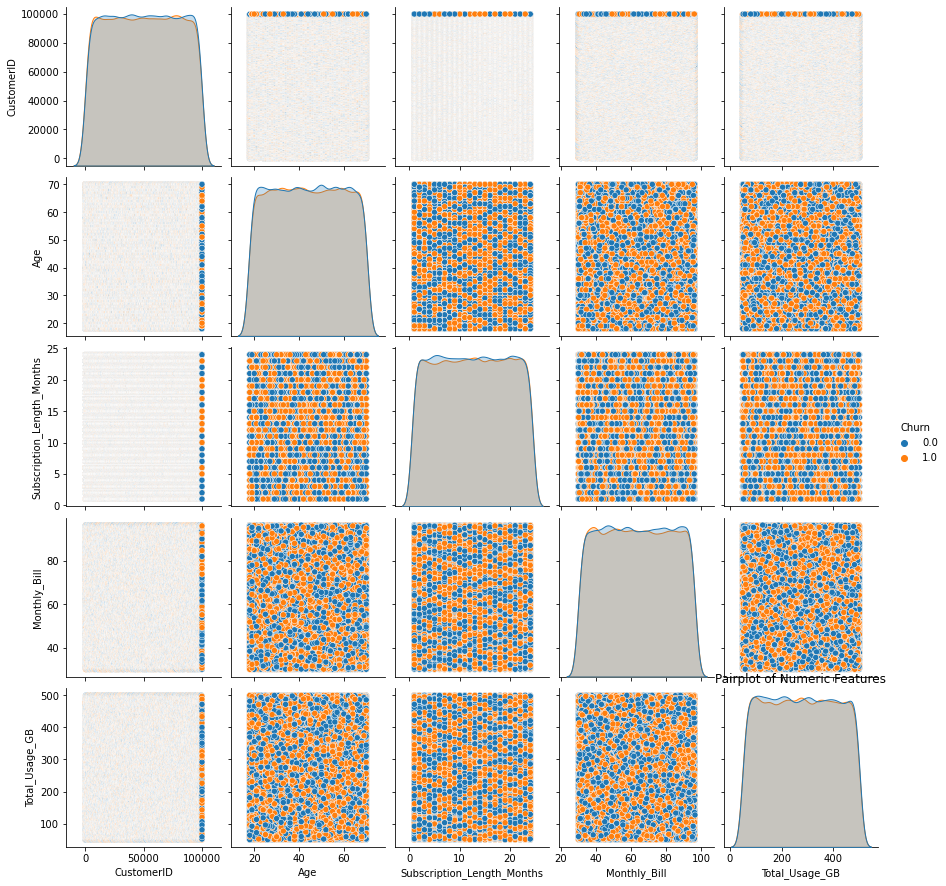

In [9]:
# Pairplot for numeric features
sns.pairplot(df, hue='Churn')
plt.title("Pairplot of Numeric Features")
plt.show()


In [10]:
X = df.drop('Churn', axis=1)
y = df['Churn']
# Separate features (X) and target variable (y)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training and testing sets

In [12]:
categorical_cols = ['Gender', 'Location']
# Define categorical columns for preprocessing


In [13]:
# Create a preprocessor to handle numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [14]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
# Preprocess the training and testing features


# Step 2: Feature Engineering
### Applied feature scaling to numeric features using StandardScaler.
### Encoded categorical variables ('Gender' and 'Location') using OneHotEncoder.
### Created polynomial features of degree 2 using PolynomialFeatures to capture non-linear relationships.

In [15]:
poly = PolynomialFeatures(degree=2)
# Apply polynomial feature transformation


In [16]:
X_train_poly = poly.fit_transform(X_train_preprocessed)


In [17]:
X_test_poly = poly.transform(X_test_preprocessed)


In [18]:
# Apply feature scaling to the polynomial features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Step 3: Model Building
### Initialized a Logistic Regression model as the baseline model.
### Trained the Logistic Regression model on the training data with scaled and engineered features.
### Evaluated model performance using accuracy, precision, recall, and F1-score metrics on the test data.

In [19]:
model = LogisticRegression()
# Initialize and train a Logistic Regression model


In [20]:
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [21]:
# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)


In [22]:
# Calculate model performance metrics
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Model Performance:
Accuracy: 0.50
Precision: 0.50
Recall: 0.42
F1-score: 0.45


# Step 4: Model Optimization
### Performed hyperparameter tuning using GridSearchCV to find the best hyperparameters for the Logistic Regression model.
### Grid search involved trying different values of 'C' (regularization strength) and 'penalty' (regularization type).
### Selected the best model based on cross-validated accuracy.

In [23]:
# Define a parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

In [24]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')


In [25]:
grid_search.fit(X_train_scaled, y_train)


C:\Users\nager\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nager\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nager\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nager\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nager\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\nager\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nager\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nager\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nager\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nager\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\nager\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nager\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nager\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nager\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nager\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [26]:
best_model = grid_search.best_estimator_
# Get the best model from grid search


In [28]:
y_pred_best = best_model.predict(X_test_scaled)
# Make predictions using the best model


In [29]:
# Calculate performance metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
print("\nBest Model Performance:")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1-score: {f1_best:.2f}")


Best Model Performance:
Accuracy: 0.50
Precision: 0.50
Recall: 0.42
F1-score: 0.45


## Save the best model using joblib


In [30]:
joblib.dump(best_model, 'churnmodel.pkl')

['churnmodel.pkl']

# Step 5: Model Deployment
#### Created a Flask web application to deploy the best model.
#### Defined a POST request route ('/predict') to accept new customer data as input.
#### Preprocessed input data, applied feature transformation, and made predictions using the best model.
#### Returned the churn predictions as JSON responses.

In [31]:
app = Flask(__name__)
# Initialize a Flask app

In [32]:
# Define a route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    try:
        input_data = request.json
        input_features = preprocessor.transform(pd.DataFrame(input_data, index=[0]))
        input_features = poly.transform(input_features)
        input_features = scaler.transform(input_features)
        predictions = best_model.predict(input_features)
        return jsonify({'predictions': predictions.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

In [ ]:
if __name__ == '__main__':
    app.run(debug=True)
# Run the Flask app


# Summary:
### In this project, we developed a machine learning model to predict customer churn. The model went through data preprocessing, feature engineering, model building, optimization, and deployment stages. Logistic Regression was chosen as the baseline model, and its hyperparameters were optimized using GridSearchCV. The final model was deployed as a Flask web application, enabling real-time churn predictions based on customer data. The approach aimed to maximize prediction accuracy and provide a practical tool for customer retention strategies.